# AIN313 ASSINGMENT 2


## Movie Review Classification System

### Step 1. Import and visualize the data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# We separate positive and negative tags by reading all files from the folder.
def load_data(directory):
    data = {'review': [], 'label': []}
    for label_type in ['pos', 'neg']:
        path = os.path.join(directory, label_type)
        for filename in os.listdir(path):
            if filename.endswith('.txt'):
                with open(os.path.join(path, filename), 'r', encoding='utf-8') as file:
                    data['review'].append(file.read())
                    data['label'].append(1 if label_type == 'pos' else 0)
    return pd.DataFrame(data)

# print basic information
def basic_info(data_set):
    print(f"This dataset contain/s {data_set.shape[0]} row/s and {data_set.shape[1]} column/s.")
    
    print("\nCount of missing values for each feature:\n")
    display(data_set.isnull().sum())

def stats_and_overview(data_set):
    # summary statistics for features
    display(data_set.describe())
    
    # overview of the dataset structure.
    display(data_set.head())

def visualize_data(df, df_name):
    # Visualizing the distribution of labels
    sns.countplot(x='label', data=df)
    plt.title(df_name + " Positive and Negative Comment Distribution ")
    plt.xticks([0, 1], ['Negatif', 'Pozitif'])
    plt.show()


In [3]:
# Specify paths to training and testing folders
train_dir = 'aclImdb/train'
test_dir = 'aclImdb/test'

# Load training and testing data
train_data = load_data(train_dir)
test_data = load_data(test_dir)

**Basic info about test and train datas**

In [4]:
basic_info(train_data)
basic_info(test_data)

This dataset contain/s 25000 row/s and 2 column/s.

Count of missing values for each feature:



review    0
label     0
dtype: int64

This dataset contain/s 25000 row/s and 2 column/s.

Count of missing values for each feature:



review    0
label     0
dtype: int64

We see that there is a no null value

**Stats and overview about train_data**

In [5]:
stats_and_overview(train_data)


,label
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


,review,label
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


**Stats and overview about test_data**

In [6]:
stats_and_overview(test_data)

,label
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


,review,label
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


**Visualization**

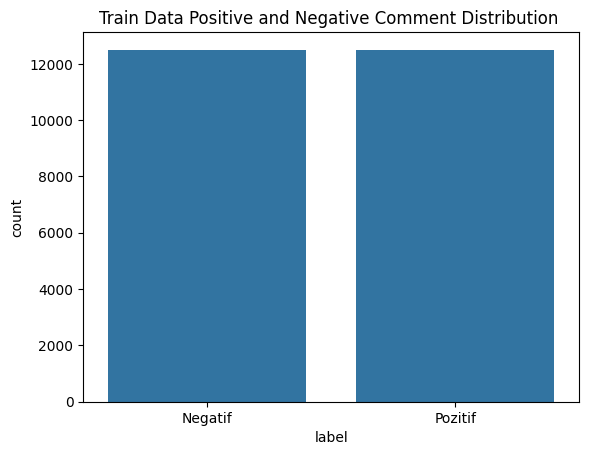

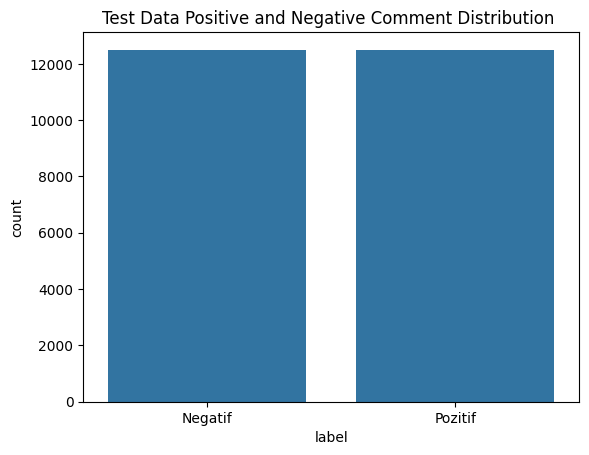

In [7]:
visualize_data(train_data, 'Train Data')
visualize_data(test_data, "Test Data")

We see that data distribution is equal

### Step 2. Use BoW (Bag of Words) methodology to own Naïve Bayes Algorithm

In [8]:
# Text cleaning 
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Making each punctuation mark into a "word" by separating it with spaces
    text = re.sub(r'([.,!?;:()"\'])', r' \1 ', text)
    # Cleaning up extra spaces
    text = re.sub(r'\s{2,}', ' ', text)
    return text.strip().split()


def build_bow(reviews, ngram=1):
    bow = defaultdict(int)
    for review in reviews:
        tokens = preprocess_text(review)
        for i in range(len(tokens) - ngram + 1):
            ngram_tuple = tuple(tokens[i:i+ngram])
            bow[ngram_tuple] += 1
    return bow

In [9]:
# Creating Unigram, Bigram and Trigram BoW models
unigram_bow = build_bow(train_data["review"], ngram=1)
bigram_bow = build_bow(train_data["review"], ngram=2)
trigram_bow = build_bow(train_data["review"], ngram=3)

print("Unigram examples:", list(unigram_bow.items())[:20])
print("Bigram examples:", list(bigram_bow.items())[:20])
print("Trigram examples:", list(trigram_bow.items())[:20])

Unigram examples: [(('for',), 43803), (('a',), 161729), (('movie',), 43389), (('that',), 72894), (('gets',), 3200), (('no',), 12282), (('respect',), 481), (('there',), 17781), (('sure',), 2621), (('are',), 29389), (('lot',), 3969), (('of',), 145244), (('memorable',), 661), (('quotes',), 98), (('listed',), 125), (('this',), 73598), (('gem',), 361), (('.',), 327192), (('imagine',), 722), (('where',), 6331)]
Bigram examples: [(('for', 'a'), 4520), (('a', 'movie'), 3135), (('movie', 'that'), 1274), (('that', 'gets'), 85), (('gets', 'no'), 16), (('no', 'respect'), 20), (('respect', 'there'), 1), (('there', 'sure'), 3), (('sure', 'are'), 1), (('are', 'a'), 1069), (('a', 'lot'), 3619), (('lot', 'of'), 2403), (('of', 'memorable'), 14), (('memorable', 'quotes'), 16), (('quotes', 'listed'), 1), (('listed', 'for'), 4), (('for', 'this'), 1550), (('this', 'gem'), 50), (('gem', '.'), 105), (('.', 'imagine'), 55)]
Trigram examples: [(('for', 'a', 'movie'), 169), (('a', 'movie', 'that'), 460), (('movi

In [ ]:
class NaiveBayesClassifier:
    def __init__(self, ngram=1, smoothing=1):
        self.ngram = ngram
        self.smoothing = smoothing
        self.pos_word_counts = defaultdict(int)
        self.neg_word_counts = defaultdict(int)
        self.total_pos_words = 0
        self.total_neg_words = 0
        self.vocab = set()
        self.pos_reviews = 0
        self.neg_reviews = 0
    
    def fit(self, data):
        # Create n-gram BoW models separately for positive and negative class
        pos_reviews = data[data['label'] == 1]['review']
        neg_reviews = data[data['label'] == 0]['review']
        
        # Generate positive and negative n-gram BoW models
        self.pos_word_counts = build_bow(pos_reviews, ngram=self.ngram)
        self.neg_word_counts = build_bow(neg_reviews, ngram=self.ngram)
        
        # Calculate total number of words for each class
        self.total_pos_words = sum(self.pos_word_counts.values())
        self.total_neg_words = sum(self.neg_word_counts.values())
        
        # Number for each comment class
        self.pos_reviews = len(pos_reviews)
        self.neg_reviews = len(neg_reviews)
        
        # Update vocabulary
        self.vocab = set(self.pos_word_counts.keys()).union(set(self.neg_word_counts.keys()))
    
    def predict(self, review):
        tokens = preprocess_text(review)
        
        # Set logarithmic probabilities with initial values
        log_prob_pos = np.log(self.pos_reviews / (self.pos_reviews + self.neg_reviews))
        log_prob_neg = np.log(self.neg_reviews / (self.pos_reviews + self.neg_reviews))

        # Add logarithmic probabilities for each n-gram
        for i in range(len(tokens) - self.ngram + 1):
            ngram_tuple = tuple(tokens[i:i+self.ngram])
            
            log_prob_pos += np.log((self.pos_word_counts[ngram_tuple] + self.smoothing) / 
                                   (self.total_pos_words + self.smoothing * len(self.vocab)))
            log_prob_neg += np.log((self.neg_word_counts[ngram_tuple] + self.smoothing) / 
                                   (self.total_neg_words + self.smoothing * len(self.vocab)))

        # Guess whichever class is bigger
        return 1 if log_prob_pos > log_prob_neg else 0

    def predict_batch(self, data):
        return [self.predict(review) for review in data['review']]


In [11]:
def nb_predictions(data, n=1):
    # Train the model
    nb_classifier = NaiveBayesClassifier(ngram=n, smoothing=1) 
    nb_classifier.fit(train_data)

    # Run the model on test data and get predictions
    test_predictions = nb_classifier.predict_batch(data)
    
    return test_predictions

In [12]:
test_predictions_n1 = nb_predictions(test_data, 1) 
test_predictions_n2 = nb_predictions(test_data, 2)
test_predictions_n3 = nb_predictions(test_data, 3)

### Step 3. Finally compute performance 

In [13]:
def performance(data, predictions, n=1):
    print(f"\nPerformances for n = {n} ")
    
    accuracy = accuracy_score(data['label'], predictions)
    precision = precision_score(data['label'], predictions)
    recall = recall_score(data['label'], predictions)
    f1 = f1_score(data['label'], predictions)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [14]:
performance(test_data, test_predictions_n1, 1)
performance(test_data, test_predictions_n2, 2)
performance(test_data, test_predictions_n3, 3)


Performances for n = 1 
Accuracy: 0.81268
Precision: 0.8599318537618565
Recall: 0.74704
F1 Score: 0.7995205274198381

Performances for n = 2 
Accuracy: 0.863
Precision: 0.897991404262784
Recall: 0.81904
F1 Score: 0.8567005564620728

Performances for n = 3 
Accuracy: 0.86928
Precision: 0.9191790773701417
Recall: 0.80976
F1 Score: 0.8610071452875128
